<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson05_MOPAC/%E3%80%9001%E3%80%91openbabel%E5%8F%8A%E3%81%B3pybel%E3%81%AE%E4%BD%BF%E3%81%84%E6%96%B9_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# google driveへの接続

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%%bash
wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
bash Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local 
conda install python=3.7 --yes
conda install -q -y -c rdkit python=3.7 rdkit

Process is terminated.


In [7]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))

In [8]:
from rdkit import Chem

In [10]:
!conda install -c openbabel openbabel eigen -y

Solving environment: \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - eigen
    - openbabel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    eigen-3.2.8                |                2         544 KB  openbabel
    openbabel-2.4.1            |           py37_6         5.1 MB  openbabel
    ------------------------------------------------------------
                                           Total:         5.6 MB

The following NEW packages will be INSTALLED:

  eigen              openbabel/linux-64::eigen-3.2.8-2
  openbabel          openbabel/linux-64::openbabel-2.4.1-py37_6



eigen-3.2.8          | 544 KB    | : 100% 1.0/1 [00:01<00:00,  1.29s/it]
openbabel-2.4.1      | 5.1 MB    | : 100% 1.0/1 [00:02<00:00,  2.10s/it]
Preparing transaction: \ done
Verifying transaction: / d

In [15]:
import openbabel
import pybel
# 新しいバージョンだと、import pybelではなくfrom openbabel import pybelで読み込むように変わっています。

In [16]:
# 読み込みフォーマットと出力のフォーマットの数
print(len(pybel.informats), len(pybel.outformats))

143 132


In [17]:
pybel.informats

{'abinit': 'ABINIT Output Format',
 'acesout': 'ACES output format',
 'acr': 'ACR format',
 'adfout': 'ADF output format',
 'alc': 'Alchemy format',
 'aoforce': 'Turbomole AOFORCE output format',
 'arc': 'Accelrys/MSI Biosym/Insight II CAR format',
 'axsf': 'XCrySDen Structure Format',
 'bgf': 'MSI BGF format',
 'box': 'Dock 3.5 Box format',
 'bs': 'Ball and Stick format',
 'c09out': 'Crystal 09 output format',
 'c3d1': 'Chem3D Cartesian 1 format',
 'c3d2': 'Chem3D Cartesian 2 format',
 'caccrt': 'Cacao Cartesian format',
 'can': 'Canonical SMILES format',
 'car': 'Accelrys/MSI Biosym/Insight II CAR format',
 'castep': 'CASTEP format',
 'ccc': 'CCC format',
 'cdjson': 'ChemDoodle JSON',
 'cdx': 'ChemDraw binary format',
 'cdxml': 'ChemDraw CDXML format',
 'cif': 'Crystallographic Information File',
 'ck': 'ChemKin format',
 'cml': 'Chemical Markup Language',
 'cmlr': 'CML Reaction format',
 'CONFIG': 'DL-POLY CONFIG',
 'CONTCAR': 'VASP format',
 'CONTFF': 'MDFF format',
 'crk2d': 'Chem

In [18]:
pybel.outformats

{'acesin': 'ACES input format',
 'adf': 'ADF cartesian input format',
 'alc': 'Alchemy format',
 'ascii': 'ASCII format',
 'bgf': 'MSI BGF format',
 'box': 'Dock 3.5 Box format',
 'bs': 'Ball and Stick format',
 'c3d1': 'Chem3D Cartesian 1 format',
 'c3d2': 'Chem3D Cartesian 2 format',
 'cac': 'CAChe MolStruct format',
 'caccrt': 'Cacao Cartesian format',
 'cache': 'CAChe MolStruct format',
 'cacint': 'Cacao Internal format',
 'can': 'Canonical SMILES format',
 'cdjson': 'ChemDoodle JSON',
 'cdxml': 'ChemDraw CDXML format',
 'cht': 'Chemtool format',
 'cif': 'Crystallographic Information File',
 'ck': 'ChemKin format',
 'cml': 'Chemical Markup Language',
 'cmlr': 'CML Reaction format',
 'com': 'Gaussian 98/03 Input',
 'confabreport': 'Confab report format',
 'CONFIG': 'DL-POLY CONFIG',
 'CONTCAR': 'VASP format',
 'CONTFF': 'MDFF format',
 'copy': 'Copy raw text',
 'crk2d': 'Chemical Resource Kit diagram(2D)',
 'crk3d': 'Chemical Resource Kit 3D format',
 'csr': 'Accelrys/MSI Quanta CSR

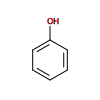

In [50]:
# smilesでの分子の読み込み
m = pybel.readstring("smiles", "C1=CC=C(C=C1)O")
m

In [20]:
# xyz座標での分子の出力
print(m.write("xyz"))

7

C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
C          0.00000        0.00000        0.00000
O          0.00000        0.00000        0.00000



In [21]:
#openbabelを用いた構造最適化
m.make3D(forcefield='mmff94', steps=1000)
print(m.write("xyz"))

13

C         -1.36737       -0.06980        0.01843
C         -0.73403        1.17390       -0.01007
C          0.65938        1.24935       -0.04859
C          1.40711        0.07517       -0.05824
C          0.78392       -1.16744       -0.03002
C         -0.60832       -1.24062        0.00845
O          2.77008        0.10158       -0.09550
H         -2.45246       -0.12694        0.04841
H         -1.32786        2.08422       -0.00221
H          1.13830        2.22276       -0.07044
H          1.38047       -2.07497       -0.03798
H         -1.09983       -2.20949        0.03060
H          3.05937        1.02828       -0.11182



In [22]:
mopac_format = m.write("mop")
print(mopac_format)

PUT KEYWORDS HERE


C  -1.36737 1 -0.06980 1  0.01843 1
C  -0.73403 1  1.17390 1 -0.01007 1
C   0.65938 1  1.24935 1 -0.04859 1
C   1.40711 1  0.07517 1 -0.05824 1
C   0.78392 1 -1.16744 1 -0.03002 1
C  -0.60832 1 -1.24062 1  0.00845 1
O   2.77008 1  0.10158 1 -0.09550 1
H  -2.45246 1 -0.12694 1  0.04841 1
H  -1.32786 1  2.08422 1 -0.00221 1
H   1.13830 1  2.22276 1 -0.07044 1
H   1.38047 1 -2.07497 1 -0.03798 1
H  -1.09983 1 -2.20949 1  0.03060 1
H   3.05937 1  1.02828 1 -0.11182 1



In [23]:
# 初めの3行を削除した。
mopac_cartesian = mopac_format.replace('PUT KEYWORDS HERE\n\n\n', '')

In [24]:
#新しい3行を追加する。
mopac_keyword = "PM7 EF\n" #ここにキーワードを書く
memo1 = m.write("smiles") #任意の文字_メモ書き 。今回は分子のsmilesを書き込んだ。
memo2 = m.write("inchi") #任意の文字_メモ書き。今回は分子のinchiを書き込んだ。

mopac_code = mopac_keyword + memo1 + memo2 + mopac_cartesian
print(mopac_code)

PM7 EF
c1ccc(cc1)O	
InChI=1S/C6H6O/c7-6-4-2-1-3-5-6/h1-5,7H
C  -1.36737 1 -0.06980 1  0.01843 1
C  -0.73403 1  1.17390 1 -0.01007 1
C   0.65938 1  1.24935 1 -0.04859 1
C   1.40711 1  0.07517 1 -0.05824 1
C   0.78392 1 -1.16744 1 -0.03002 1
C  -0.60832 1 -1.24062 1  0.00845 1
O   2.77008 1  0.10158 1 -0.09550 1
H  -2.45246 1 -0.12694 1  0.04841 1
H  -1.32786 1  2.08422 1 -0.00221 1
H   1.13830 1  2.22276 1 -0.07044 1
H   1.38047 1 -2.07497 1 -0.03798 1
H  -1.09983 1 -2.20949 1  0.03060 1
H   3.05937 1  1.02828 1 -0.11182 1



In [25]:
# ファイルへの書き込み
with open("phenol.dat", mode='w') as f:
    f.write(mopac_code)

# 以下は、入力ファイルの形式などについてです。

入力ファイルの構成について
入力ファイルは、最初の行に使用するハミルトニアン(AM1, PM3など)と計算に必要なキーワードを指定。
2行目と3行目はスペースです(個人的なメモを記入してもOKです)。
4行目から、分子座標を入力します。分子座標の最後に空白行を加えれば、入力ファイルの完成です。
テキストエディッタで作成する場合は、拡張子を.datにすればOKです。

【 計算目的 】
ハミルトニアンと組み合わせて計算目的を指定します。例えば、「PM3 EF」と記述すれば「PM3法で構造最適化計算」を実行します。常用するのは、以下の5つです。

1) EF： 構造最適化
2) FORCE： 振動解析
3) TS： 遷移状態探索
4) SADDLE： 与えられた2つの構造から遷移状態の候補構造を計算する
5) IRC：極限反応座標計算 (IRC=1, IRC=-1)

【 オプション 】
上記のハミルトニアンと計算目的に対して、さらに追加情報を記述します。例えば「PM3 EF PRECISE GEO-OK」であれば「PM3法の構造最適化で収束判定を100倍厳しくし、なおかつ原子が異常接近を無視して計算」という命令を実行します。常用するのは、以下の5つです。

1) PRECISE：収束判定を100倍厳しくする
2) GEO-OK：原子が異常に接近した場合のチェックを無視する
3) LARGE=n：IRC計算と組み合わせてIRC距離毎の計算回数を指定
※ex. PM3 IRC=1 LARGE=50 (この場合、IRC距離50回おきに計算と指定しています)
4) RECALC=n： 最適化サイクルごとに二次微分を計算させる (系のポテンシャル曲面が浅い場合等に使用します)

# RDKitのmolファイルから変換するやり方



In [35]:
# ファイルのコピーは、wgetというコマンドが使用できる。
!wget -P "/content/drive/MyDrive/data" https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson05_MOPAC/PubChem_compound_list_antioxidant.sdf 

--2022-09-19 05:27:24--  https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson05_MOPAC/PubChem_compound_list_antioxidant.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733745 (717K) [text/plain]
Saving to: ‘/content/drive/MyDrive/data/PubChem_compound_list_antioxidant.sdf.1’

PubChem_compound_li 100%[===================>] 716.55K  --.-KB/s    in 0.03s   

2022-09-19 05:27:24 (24.5 MB/s) - ‘/content/drive/MyDrive/data/PubChem_compound_list_antioxidant.sdf.1’ saved [733745/733745]



In [62]:
molecules = pybel.readfile("sdf","/content/drive/MyDrive/data/PubChem_compound_list_antioxidant.sdf")
# どれくらいの分子が入っているかを確認
len(list(molecules))

122

In [63]:
#分子の構造をsmilesで表示させてみる。
for molecule in pybel.readfile("sdf","/content/drive/MyDrive/data/PubChem_compound_list_antioxidant.sdf"):
  print(molecule.write())

Oc1c(N)c(ccc1)C(=O)O	86

S[C@@H](CCCCC(=O)O)CCS	421

S(=O)(C)C	679

Oc1ccc(O)cc1	785

O=C(Cc1c2c([nH]c1)cccc2)C(=O)O	803

S1SCC[C@H]1CCCCC(=O)O	864

O(c1cc2c(CCNC(=O)C)c[nH]c2cc1)C	896

O=N	945

Oc1c(O)cccc1O	1057

O=c1[nH]c(=O)[nH]c2[nH]c(=O)[nH]c12	1175

O(c1cc(ccc1O)C=O)C	1183

O(c1cc(ccc1O)C(=O)C)C	2214

Oc1c(C(C)(C)C)cc(O)c(C(C)(C)C)c1	2374

O(c1c2c3c([nH]c2ccc1)cccc3)C[C@H](O)CNCCOc1c(OC)cccc1	2585

OCCCCCCCCCCC1=C(C(=O)C(=C(OC)C1=O)OC)C	3686

o1c(cc(=O)c(O)c1)CO	3840

O=C1N(N=C(C1)C)c1ccccc1	4021

Oc1cc(C[C@H]([C@@H](Cc2cc(O)c(O)cc2)C)C)ccc1O	4534

O=c1n(CCCCC(=O)C)c(=O)n(c2ncn(c12)C)C	4740

S(c1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)C(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)(C)C	4912

O(CCC)C(=O)c1cc(O)c(O)c(O)c1	4947

Clc1ccc(C(=O)N[C@@H](Cc2c3c([nH]c(=O)c2)cccc3)C(=O)O)cc1	5042

O[C@@H](CCCCC)c1cc(OCc2nc3c(cc2)cccc3)ccc1	5059

OC1CC(N(O)C(C1)(C)C)(C)C	5395

S(=O)(=O)(N)Cc1noc2c1cccc2	5734

S1SCC[C@H]1CCCCC(=O)O	6112

N(c1ccc(Nc2ccccc2)cc1)c1ccccc1	6319

Oc1ccc(C(c2ccc(O)cc2)(C)C)cc1	6623

O=

In [60]:
# 今まで行ってきたことのまとめで複数分子を同時に出力する。
for molecule in pybel.readfile("sdf","/content/drive/MyDrive/data/PubChem_compound_list_antioxidant.sdf"):
  molecule.make3D(forcefield='mmff94', steps=1000)
  mopac_format = m.write("mop")
  mopac_cartesian = mopac_format.replace('PUT KEYWORDS HERE\n\n\n', '')
  mopac_keyword = "PM7 EF\n" #ここにキーワードを書く
  memo1 = m.write("smiles") #任意の文字_メモ書き 。今回は分子のsmilesを書き込んだ。
  memo2 = m.write("inchi") #任意の文字_メモ書き。今回は分子のinchiを書き込んだ。
  mopac_code = mopac_keyword + memo1 + memo2 + mopac_cartesian
  molecule.title = molecule.write("inchikey") #ファイル名をinchikeyにするために、分子のタイトルをつける。
  path = "/content/drive/MyDrive/data/mopac/"+molecule.title+".dat"
  with open(path, mode='w') as f:
    f.write(mopac_code)
  

Oc1c(N)c(ccc1)C(=O)O	86

S[C@@H](CCCCC(=O)O)CCS	421

S(=O)(C)C	679

Oc1ccc(O)cc1	785

O=C(Cc1c2c([nH]c1)cccc2)C(=O)O	803

S1SCC[C@H]1CCCCC(=O)O	864

O(c1cc2c(CCNC(=O)C)c[nH]c2cc1)C	896

O=N	945

Oc1c(O)cccc1O	1057

O=c1[nH]c(=O)[nH]c2[nH]c(=O)[nH]c12	1175

O(c1cc(ccc1O)C=O)C	1183

O(c1cc(ccc1O)C(=O)C)C	2214

Oc1c(C(C)(C)C)cc(O)c(C(C)(C)C)c1	2374

O(c1c2c3c([nH]c2ccc1)cccc3)C[C@H](O)CNCCOc1c(OC)cccc1	2585

OCCCCCCCCCCC1=C(C(=O)C(=C(OC)C1=O)OC)C	3686

o1c(cc(=O)c(O)c1)CO	3840

O=C1N(N=C(C1)C)c1ccccc1	4021

Oc1cc(C[C@H]([C@@H](Cc2cc(O)c(O)cc2)C)C)ccc1O	4534

O=c1n(CCCCC(=O)C)c(=O)n(c2ncn(c12)C)C	4740

S(c1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)C(Sc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)(C)C	4912

O(CCC)C(=O)c1cc(O)c(O)c(O)c1	4947

Clc1ccc(C(=O)N[C@@H](Cc2c3c([nH]c(=O)c2)cccc3)C(=O)O)cc1	5042

O[C@@H](CCCCC)c1cc(OCc2nc3c(cc2)cccc3)ccc1	5059

OC1CC(N(O)C(C1)(C)C)(C)C	5395

S(=O)(=O)(N)Cc1noc2c1cccc2	5734

S1SCC[C@H]1CCCCC(=O)O	6112

N(c1ccc(Nc2ccccc2)cc1)c1ccccc1	6319

Oc1ccc(C(c2ccc(O)cc2)(C)C)cc1	6623

O=

In [42]:
help(m.write)

Help on method write in module pybel:

write(format='smi', filename=None, overwrite=False, opt=None) method of pybel.Molecule instance
    Write the molecule to a file or return a string.
    
    Optional parameters:
       format -- see the informats variable for a list of available
                 output formats (default is "smi")
       filename -- default is None
       overwite -- if the output file already exists, should it
                   be overwritten? (default is False)
       opt -- a dictionary of format specific options
              For format options with no parameters, specify the
              value as None.
    
    If a filename is specified, the result is written to a file.
    Otherwise, a string is returned containing the result.
    
    To write multiple molecules to the same file you should use
    the Outputfile class.

